In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, auc, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
np.random.seed(44)

In [3]:
def print_scores(y_test, y_pred, y_pred_prob):
    print('recall score:',recall_score(y_test, y_pred))
    print('precision score:',precision_score(y_test, y_pred))
    print('f1 score (weighted average of the precision and recall):',f1_score(y_test, y_pred))
    print('accuracy score:',accuracy_score(y_test,y_pred))

In [8]:
df = pd.read_csv('data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Outcome as pie chart:


Text(0, 0.5, '')

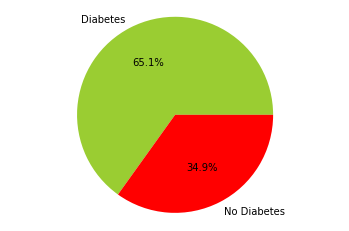

In [9]:
print("Outcome as pie chart:")
fig, ax = plt.subplots(1, 1)
ax.pie(df.Outcome.value_counts(),autopct='%1.1f%%', labels=['Diabetes','No Diabetes'], colors=['yellowgreen','r'])
plt.axis('equal')
plt.ylabel('')

Age
763    63
764    27
765    30
766    47
767    23
Name: Age, dtype: int64


Text(0, 0.5, '# of Cases')

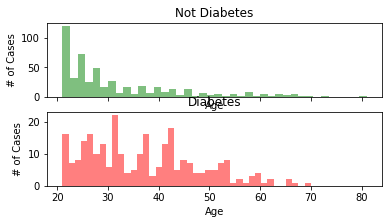

In [10]:
##### plot Time to see if there is any trend
print("Age")
print(df["Age"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Age[df.Outcome==0], bins=40, color='g',alpha=0.5)
ax1.set_title('Not Diabetes')
ax1.set_xlabel('Age')
ax1.set_ylabel('# of Cases')
ax2.hist(df.Age[df.Outcome==1], bins=40, color='r',alpha=0.5)
ax2.set_title('Diabetes')
ax2.set_xlabel('Age')
ax2.set_ylabel('# of Cases')

Text(0, 0.5, '# of Cases')

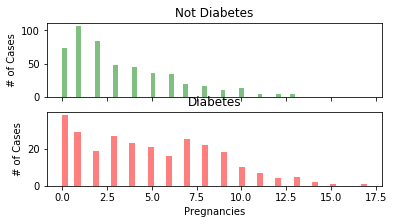

In [11]:
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Pregnancies[df.Outcome==0],bins=50, color='g',alpha=0.5)
ax3.set_title('Not Diabetes') 
ax3.set_ylabel('# of Cases')
ax4.hist(df.Pregnancies[df.Outcome==1],bins=50, color='r',alpha=0.5)
ax4.set_title('Diabetes')
ax4.set_xlabel('Pregnancies')
ax4.set_ylabel('# of Cases')

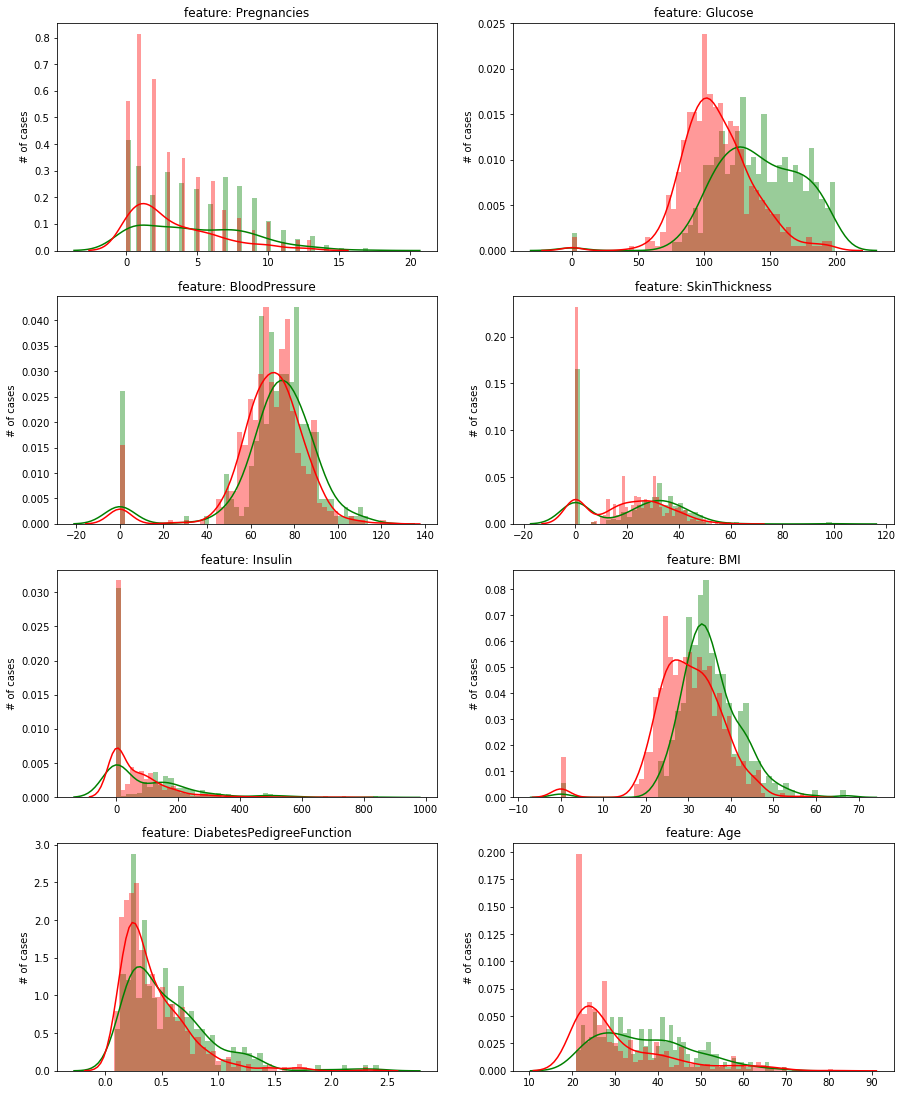

In [34]:
import seaborn as sns
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(28, 2)
plt.figure(figsize=(15,28*5))
for i, col in enumerate(df[ df.iloc[:,0:8].columns]):
    ax = plt.subplot(gs[i])
    sns.distplot(df[col][df.Outcome == 1], kde=True, bins=50, color='g')
    sns.distplot(df[col][df.Outcome == 0], kde=True, bins=50, color='r')
    ax.set_xlabel('')
    ax.set_ylabel('# of cases')
    ax.set_title('feature: ' + str(col))
plt.show()

In [ ]:
corr 

In [13]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:
print("Length of training labels:", len(y_train))
print("Length of testing labels:", len(y_test))
print("Length of training features:", len(X_train))
print("Length of testing features:", len(X_test))

Length of training labels: 614
Length of testing labels: 154
Length of training features: 614
Length of testing features: 154


# Bernoulli Naive-Bayes

In [15]:
bnb = BernoulliNB()

In [16]:
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [13]:
y_pred = bnb.predict(X_test)

In [14]:
confusion_matrix(y_test, y_pred)

array([[95,  5],
       [49,  5]])

In [15]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,95,5,100
1,49,5,54
All,144,10,154


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.95      0.78       100
           1       0.50      0.09      0.16        54

   micro avg       0.65      0.65      0.65       154
   macro avg       0.58      0.52      0.47       154
weighted avg       0.60      0.65      0.56       154



In [17]:
y_pred_proba = bnb.predict_proba(X_test)[:,1]

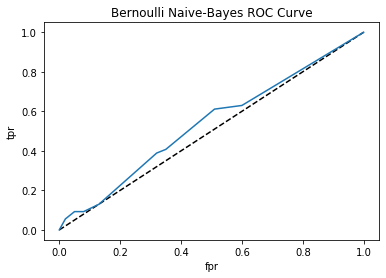

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='BNB')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('Bernoulli Naive-Bayes ROC Curve')
plt.show()

In [19]:
roc_auc_score(y_test, y_pred_proba)

0.5355555555555556

# Gaussian Naive-Bayes

In [20]:
gnb = GaussianNB()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[74, 26],
       [19, 35]])

In [23]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,74,26,100
1,19,35,54
All,93,61,154


In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.57      0.65      0.61        54

   micro avg       0.71      0.71      0.71       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.72      0.71      0.71       154



In [25]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

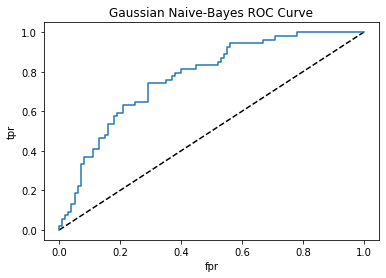

In [26]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('Gaussian Naive-Bayes ROC Curve')
plt.show()

In [27]:
roc_auc_score(y_test, y_pred_proba)

0.7727777777777778

### Drop BMI

In [28]:
df = df.drop('BMI', axis=1)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,0.171,63,0
764,2,122,70,27,0,0.340,27,0
765,5,121,72,23,112,0.245,30,0
766,1,126,60,0,0,0.349,47,1


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [30]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[79, 21],
       [23, 31]])

In [31]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,79,21,100
1,23,31,54
All,102,52,154


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.60      0.57      0.58        54

   micro avg       0.71      0.71      0.71       154
   macro avg       0.69      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



In [33]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

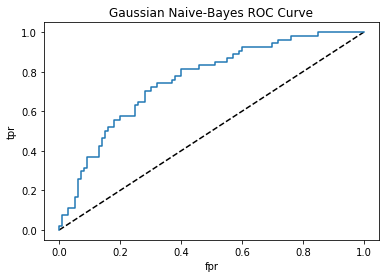

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian Naive-Bayes ROC Curve')
plt.show()

In [35]:
roc_auc_score(y_test, y_pred_proba)

0.7583333333333333

### Drop Pregnancies

In [36]:
df = pd.read_csv('diabetes.csv')
df = df.drop('Pregnancies', axis=1)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[80, 20],
       [24, 30]])

In [39]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,80,20,100
1,24,30,54
All,104,50,154


In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       100
           1       0.60      0.56      0.58        54

   micro avg       0.71      0.71      0.71       154
   macro avg       0.68      0.68      0.68       154
weighted avg       0.71      0.71      0.71       154



In [41]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

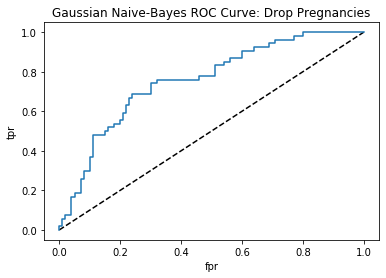

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian Naive-Bayes ROC Curve: Drop Pregnancies')
plt.show()

In [43]:
roc_auc_score(y_test, y_pred_proba)

0.7562962962962964

### Drop Insulin

In [44]:
df = pd.read_csv('diabetes.csv')
df = df.drop('Insulin', axis=1)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [46]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[78, 22],
       [20, 34]])

In [47]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,78,22,100
1,20,34,54
All,98,56,154


In [48]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.63      0.62        54

   micro avg       0.73      0.73      0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [49]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

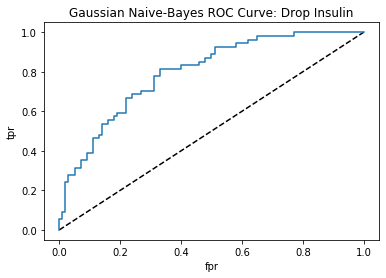

In [50]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian Naive-Bayes ROC Curve: Drop Insulin')
plt.show()

In [51]:
roc_auc_score(y_test, y_pred_proba)

0.7972222222222222

## Drop DiabetesPedigreeFunction

In [52]:
df = pd.read_csv('diabetes.csv')
df = df.drop('DiabetesPedigreeFunction', axis=1)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [54]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[74, 26],
       [22, 32]])

In [55]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,74,26,100
1,22,32,54
All,96,58,154


In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.74      0.76       100
           1       0.55      0.59      0.57        54

   micro avg       0.69      0.69      0.69       154
   macro avg       0.66      0.67      0.66       154
weighted avg       0.69      0.69      0.69       154



In [57]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

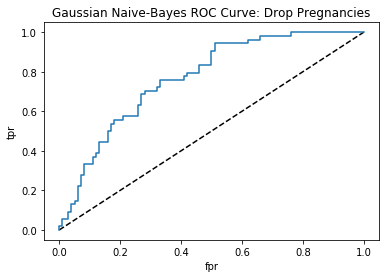

In [58]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian Naive-Bayes ROC Curve: Drop Pregnancies')
plt.show()

In [59]:
roc_auc_score(y_test, y_pred_proba)

0.7685185185185185

### Drop SkinThickness

In [60]:
df = pd.read_csv('diabetes.csv')
df = df.drop('SkinThickness', axis=1)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [62]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[75, 25],
       [19, 35]])

In [63]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,75,25,100
1,19,35,54
All,94,60,154


In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77       100
           1       0.58      0.65      0.61        54

   micro avg       0.71      0.71      0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.72       154



In [65]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

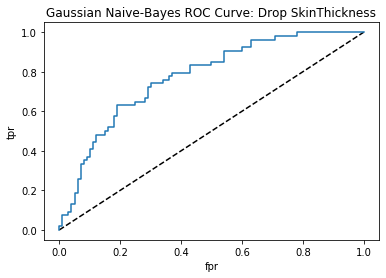

In [66]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian Naive-Bayes ROC Curve: Drop SkinThickness')
plt.show()

In [67]:
roc_auc_score(y_test, y_pred_proba)

0.7748148148148148

### Drop Insulin & SkinThickness

In [68]:
df = pd.read_csv('diabetes.csv')
df = df.drop(['SkinThickness', 'Insulin'], axis=1)
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [70]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[78, 22],
       [19, 35]])

In [71]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,78,22,100
1,19,35,54
All,97,57,154


In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       100
           1       0.61      0.65      0.63        54

   micro avg       0.73      0.73      0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.73      0.74       154



In [73]:
y_pred_proba = gnb.predict_proba(X_test)[:,1]

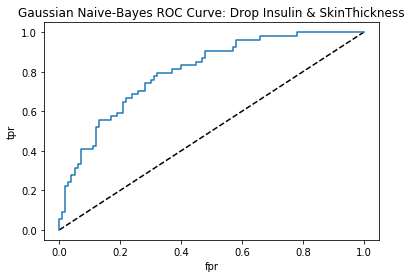

In [74]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='GNB')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Gaussian Naive-Bayes ROC Curve: Drop Insulin & SkinThickness')
plt.show()

In [75]:
roc_auc_score(y_test, y_pred_proba)

0.8018518518518518